In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

C:\Users\durva\OneDrive\NTU courses\SEM 2\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import shutil
from random import sample

def split_data(source_dir, train_dir, test_dir, test_size = 0.25):
   
    
    all_files = os.listdir(source_dir)
    num_test_files = int(len(all_files) * test_size)
    test_files = sample(all_files, num_test_files)
    
    for file in test_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(test_dir, file))
        
    remaining_files = os.listdir(source_dir)
    
    for file in remaining_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(train_dir, file))
        
no_yawn_dir = 'no_yawn'
yawn_dir = 'yawn'
training_data_dir = 'train_yawn'
testing_data_dir = 'test_yawn'

# Perform the split for closed eyes
split_data(no_yawn_dir, os.path.join(training_data_dir, 'no_yawn_train'), os.path.join(testing_data_dir, 'no_yawn_test'))

# Perform the split for open eyes
split_data(yawn_dir, os.path.join(training_data_dir, 'yawn_train'), os.path.join(testing_data_dir, 'yawn_test'))

In [4]:
img_size = 224
training_data = []

dataDirectory = 'train_yawn'
Classes = ['no_yawn_train', 'yawn_train']
def create_training_Data():

    for category in Classes:
        path = os.path.join(dataDirectory, category)
        class_num = Classes.index(category) # as 0 or 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
               
            except Exception as e:
                pass


In [6]:
create_training_Data()

In [7]:
print(len(training_data))

3840


In [8]:
import random
random.shuffle(training_data) # to avoid overfitting



In [9]:
X = []
y = []

for features,label in training_data:  #classifying as X and y. X will contain the array and y will be 0 or 1
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [10]:
X.shape

(3840, 224, 224, 3)

In [12]:
X = X / 255.0

In [13]:
X

array([[[[0.43529412, 0.43529412, 0.43529412],
         [0.43137255, 0.43137255, 0.43137255],
         [0.41176471, 0.41176471, 0.41176471],
         ...,
         [0.29411765, 0.29411765, 0.29411765],
         [0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294]],

        [[0.43529412, 0.43529412, 0.43529412],
         [0.43137255, 0.43137255, 0.43137255],
         [0.41176471, 0.41176471, 0.41176471],
         ...,
         [0.29411765, 0.29411765, 0.29411765],
         [0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294]],

        [[0.44313725, 0.44313725, 0.44313725],
         [0.43921569, 0.43921569, 0.43921569],
         [0.42352941, 0.42352941, 0.42352941],
         ...,
         [0.29803922, 0.29803922, 0.29803922],
         [0.29019608, 0.29019608, 0.29019608],
         [0.29019608, 0.29019608, 0.29019608]],

        ...,

        [[0.16470588, 0.16470588, 0.16470588],
         [0.16470588, 0.16470588, 0.16470588]

In [14]:
Y = np.array(y)

In [15]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Deep Learning model for training - Transfer Learning

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

# Transfer Learning

In [19]:
base_input = model.layers[0].input # get the input layer (224, 224, 3),  this is why we had to resize
base_output = model.layers[-4].output
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [20]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [21]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [22]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [23]:
new_model.fit(X, Y, epochs = 3, validation_split = 0.1) ## training

Epoch 1/3


108/108 [==============================] - 230s 2s/step - loss: 0.1744 - accuracy: 0.9531 - val_loss: 0.0603 - val_accuracy: 0.9792
Epoch 2/3
108/108 [==============================] - 213s 2s/step - loss: 0.0363 - accuracy: 0.9867 - val_loss: 0.0465 - val_accuracy: 0.9922
Epoch 3/3
108/108 [==============================] - 214s 2s/step - loss: 0.0366 - accuracy: 0.9867 - val_loss: 0.1151 - val_accuracy: 0.9688


In [24]:
new_model.save('my_model_mouth.keras')

In [25]:
# new_model = tf.keras.load_model('my_model_mouth.keras')

# check network for predictions

In [26]:
img_size = 224
testing_data = []

dataDirectory = 'test_yawn'
Classes = ['no_yawn_test', 'yawn_test']
def create_testing_Data():

    for category in Classes:
        path = os.path.join(dataDirectory, category)
        class_num = Classes.index(category) # as 0 or 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                testing_data.append([new_array, class_num])
               
            except Exception as e:
                pass

In [27]:
create_testing_Data()

In [28]:
X_test = []
y_test = []

for features,label in training_data:  #classifying as X and y. X will contain the array and y will be 0 or 1
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [29]:
X_test.shape

(3840, 224, 224, 3)

In [30]:
X_test

array([[[[111, 111, 111],
         [110, 110, 110],
         [105, 105, 105],
         ...,
         [ 75,  75,  75],
         [ 72,  72,  72],
         [ 72,  72,  72]],

        [[111, 111, 111],
         [110, 110, 110],
         [105, 105, 105],
         ...,
         [ 75,  75,  75],
         [ 72,  72,  72],
         [ 72,  72,  72]],

        [[113, 113, 113],
         [112, 112, 112],
         [108, 108, 108],
         ...,
         [ 76,  76,  76],
         [ 74,  74,  74],
         [ 74,  74,  74]],

        ...,

        [[ 42,  42,  42],
         [ 42,  42,  42],
         [ 40,  40,  40],
         ...,
         [ 12,  12,  12],
         [ 12,  12,  12],
         [ 12,  12,  12]],

        [[ 46,  46,  46],
         [ 45,  45,  45],
         [ 43,  43,  43],
         ...,
         [ 12,  12,  12],
         [ 12,  12,  12],
         [ 12,  12,  12]],

        [[ 46,  46,  46],
         [ 46,  46,  46],
         [ 43,  43,  43],
         ...,
         [ 12,  12,  12],
        

In [31]:
X_test = X_test / 255.0

In [32]:
Y_test = np.array(y_test)

In [33]:
Y_test

array([0, 1, 1, ..., 0, 0, 1])

In [35]:
predictions = new_model.predict(X_test)

predicted_classes = (predictions > 0.5).astype(int)


from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(y_test, predicted_classes)

report = classification_report(y_test, predicted_classes)

print(f"Accuracy on test data: {accuracy}")
print(report)

120/120 [==============================] - 65s 537ms/step
Accuracy on test data: 0.9661458333333334
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1944
           1       0.98      0.95      0.97      1896

    accuracy                           0.97      3840
   macro avg       0.97      0.97      0.97      3840
weighted avg       0.97      0.97      0.97      3840



# check on unknown images

## first lets try with no yawn

In [40]:
img_no_yawn = cv2.imread('no_yawn_image.jpg')

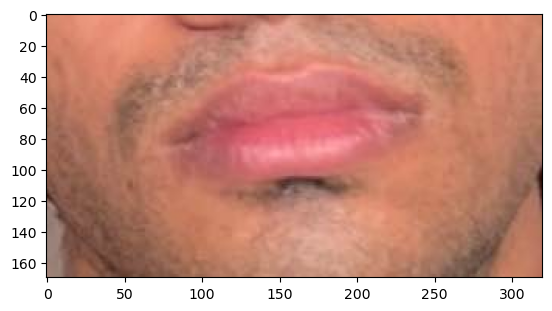

In [41]:
plt.imshow(cv2.cvtColor(img_no_yawn, cv2.COLOR_BGR2RGB))

In [42]:
img_no_yawn.shape

(170, 320, 3)

In [43]:
img_no_yawn = cv2.resize(img_no_yawn, (224,224))
img_no_yawn = np.expand_dims(img_no_yawn, axis=0)
img_no_yawn = img_no_yawn/255.0

In [44]:
img_no_yawn.shape

(1, 224, 224, 3)

In [59]:
new_model.predict(img_no_yawn)

1/1 [==============================] - 0s 98ms/step


array([[0.00691035]], dtype=float32)

In [62]:
def predict(input_image):
    prediction = new_model.predict(input_image)
    if (prediction > 0.5):
        label = 1
        print("you are yawning")
    else:
        label = 0
        print("you are not yawning")
    print(label)


In [63]:
predict(img_no_yawn)

1/1 [==============================] - 0s 118ms/step
you are not yawning
0


## now lets try with yawn

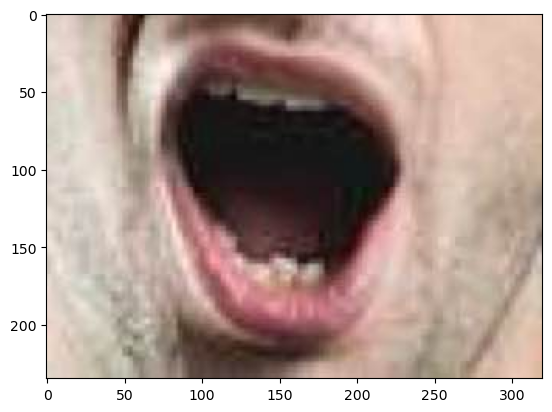

In [48]:
img_yawn = cv2.imread('yawning_image.jpg')

# Ensure the image is in the correct 8-bit unsigned integer format
img_yawn = cv2.convertScaleAbs(img_yawn)

# Now you can convert the color space from BGR to RGB
img_yawn = cv2.cvtColor(img_yawn, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib
plt.imshow(img_yawn)
plt.show()


In [49]:
img_yawn.shape

(235, 320, 3)

In [50]:
img_yawn = cv2.resize(img_yawn, (224,224))
img_yawn = np.expand_dims(img_yawn, axis=0)
img_yawn = img_yawn/255.0

In [51]:
img_yawn.shape

(1, 224, 224, 3)

In [64]:
predict(img_yawn)

1/1 [==============================] - 0s 117ms/step
you are yawning
1


## now lets try with one more image

In [65]:
image = cv2.imread('test_image_yawn.jpg')

In [66]:
plt.imshow(cv2.cvtColor(img_no_yawn, cv2.COLOR_BGR2RGB))

error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xa7e5ea26::Set<3,4,-1>,struct cv::impl::A0xa7e5ea26::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


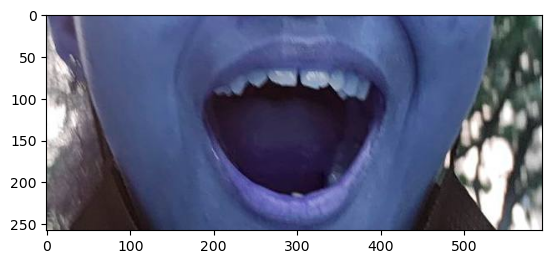

In [71]:
img_yawn = cv2.convertScaleAbs(image)

# Now you can convert the color space from BGR to RGB
img_yawn = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib
plt.imshow(image)
plt.show()

In [72]:
image.shape

(258, 594, 3)

In [73]:
image = cv2.resize(image, (224,224))
image = np.expand_dims(image, axis=0)
image = image/255.0

In [74]:
image.shape

(1, 224, 224, 3)

In [75]:
predict(image)

1/1 [==============================] - 0s 86ms/step
you are yawning
1


## one more image 

In [76]:
image2 = cv2.imread('another_image.jpg')

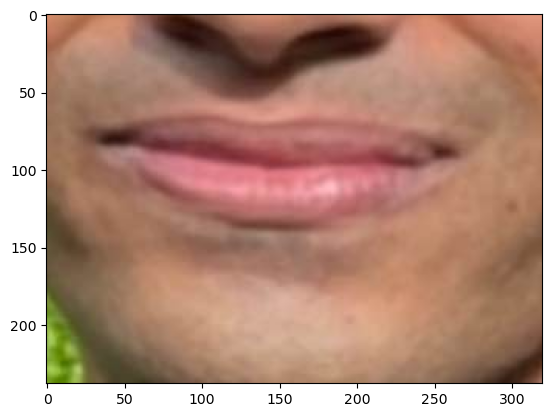

In [78]:
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [80]:
image2.shape

(238, 320, 3)

In [81]:
image2 = cv2.resize(image2, (224,224))
image2 = np.expand_dims(image2, axis=0)
image2 = image2 /255.0

In [82]:
image2.shape

(1, 224, 224, 3)

In [83]:
image2

array([[[[0.43137255, 0.55686275, 0.83529412],
         [0.42745098, 0.55294118, 0.83137255],
         [0.41960784, 0.54509804, 0.82352941],
         ...,
         [0.50196078, 0.6       , 0.89019608],
         [0.50196078, 0.6       , 0.89019608],
         [0.50196078, 0.6       , 0.89019608]],

        [[0.42745098, 0.55294118, 0.82745098],
         [0.42352941, 0.54901961, 0.82745098],
         [0.41568627, 0.54117647, 0.81960784],
         ...,
         [0.49803922, 0.59607843, 0.88627451],
         [0.49803922, 0.59607843, 0.88627451],
         [0.49803922, 0.59607843, 0.88627451]],

        [[0.41960784, 0.54509804, 0.81960784],
         [0.41568627, 0.54117647, 0.81960784],
         [0.40784314, 0.53333333, 0.81176471],
         ...,
         [0.49411765, 0.59215686, 0.88235294],
         [0.49411765, 0.59215686, 0.88235294],
         [0.49411765, 0.59215686, 0.88235294]],

        ...,

        [[0.14117647, 0.60784314, 0.45490196],
         [0.13333333, 0.61176471, 0.45490196]

In [84]:
predict(image2)

1/1 [==============================] - 0s 76ms/step
you are not yawning
0


# Now lets make a function to automate the whole process

In [94]:
#the function will take in the url of the image
def predict_yawn(input_image):
    img = cv2.imread(input_image)
    img = cv2.convertScaleAbs(img)

    # Now you can convert the color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = np.expand_dims(img, axis=0)
    img = img /255.0
    
    prediction = new_model.predict(img)
    if (prediction > 0.5):
        label = 1
        print("you are yawning")
    else:
        label = 0
        print("you are not yawning")
    print(label)


In [101]:
predict_yawn('test_img.jpg')

1/1 [==============================] - 0s 92ms/step
you are not yawning
0


# now we can modify the function such that we will provide a face, and it will predict yawn or no yawn status

## for that we can use pre-trained models to identify face and mouth

In [160]:
# Load the pre-trained Haar Cascades for face and mouth detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')


## modify the predict_yawn function to use the cropped mouth image on faces

In [161]:
def predict_yawn(input_image):
    # Load the image
    img = cv2.imread(input_image)
    if img is None:
        print("Image not loaded, check the file path.")
        return

    # Convert to grayscale for Haar Cascade
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No faces detected.")
        return

    for (x, y, w, h) in faces:
        # Crop the face from the image
        roi_color = img[y:y+h, x:x+w]  # Use the original color image for ROI

        # Consider only the lower half of the face for mouth detection
        roi_color_lower = roi_color[h//2:h, :]

        # Convert the lower half to grayscale for mouth detection
        roi_gray_lower = cv2.cvtColor(roi_color_lower, cv2.COLOR_BGR2GRAY)

        # Detect mouth within the lower face region
        mouths = mouth_cascade.detectMultiScale(roi_gray_lower, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(mouths) == 0:
            print("No mouth detected in the face region.")
            continue

        # Assume the first detected mouth is the one we want
        mx, my, mw, mh = mouths[0]

        # Crop the mouth region from the color face ROI
        mouth_roi = roi_color_lower[my:my+mh, mx:mx+mw]

        # Preprocess the mouth ROI for the neural network
        # Resize, expand dimensions, and normalize
        mouth_roi = cv2.resize(mouth_roi, (224, 224))
        mouth_roi = mouth_roi / 255.0
        mouth_roi = np.expand_dims(mouth_roi, axis=0)

        # Predict using the loaded model
        prediction = new_model.predict(mouth_roi)

        # Output prediction
        if prediction > 0.5:
            print("you are yawning")
        else:
            print("you are not yawning")
        return  # Exit after the first mouth is processed

In [162]:
predict_yawn('testt.jpg')

1/1 [==============================] - 0s 137ms/step
you are not yawning


In [163]:
predict_yawn('imgg.jpg')

1/1 [==============================] - 0s 92ms/step
you are yawning


# now lets do the same for eyes, we will predict whether the eyes are open or closed

## since we do not have enough space, we had to use a memory map

# Deep Learning model for training

In [33]:
# load model
#new_model = tf.keras.models.load_model('my_model.keras')